# Importar librerías

In [1260]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Carga de datos y división en train/test

In [1261]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


# Analisis exploratorio

## Eliminar columnas que no aportan información relevante

Vemos las columnas que hay en los datos

In [1262]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [1263]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

Las columnas referidas a IDs y urls considero que no aportan informacion

In [1264]:
#  elimino las columnas que se refieren a urls e ids
df_clean = df.drop(df.columns[df.columns.str.contains("Url")], axis=1)
df_clean = df_clean.drop(df.columns[df.columns.str.contains("URL")], axis=1)
df_clean = df_clean.drop(df.columns[df.columns.str.contains("ID")], axis=1)
df_clean = df_clean.drop(df.columns[df.columns.str.contains("Scraped")], axis=1)
df_clean.head()

,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,today,NaN,15,39,64,208,20,2016-08-05,2017-03-20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,NaN,羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...,NaN,NaN,NaN,玲,2016-07-17,"Madrid, Community of Madrid, Spain","Our hotel near the city center, next to the su...",within an hour,100.0,NaN,Carabanchel,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...","Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.

In [1265]:
# pd.reset_option('display.max_columns')
# nos quedamos con las siguientes columnas
df_clean.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availabi

## Columnas con contenido en texto

hay ciertas columnas de texto (no columnas categóricas) que a priori no vamos a poder tratar correctamente (no son variables categoricas), vamos a eliminarlas tambien

In [1266]:
columns_text=['Host Name','Name','Summary','Space','Description','Neighborhood Overview','Host About','Notes','Transit','Access','Interaction','House Rules','Features']
df_clean = df_clean.drop(columns_text, axis=1)
df_clean.head()

,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,none,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",within a few hours,100.0,NaN,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733"
1,none,2016-07-22,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,today,NaN,15,39,64,208,20,2016-08-05,2017-03-20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765"
2,none,2016-07-17,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Carabanchel,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...","Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",NaN,10.0,NaN,NaN,NaN,5.0,1,0,3,30,a week ago,NaN,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557"
3,none,2014-05-08,"Madrid, Community of Madrid, Spain",within a few hours,100.0,NaN,Justicia,114.0,114.0,"email,phone,reviews,work_email","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",NaN,30.0,NaN,NaN,NaN,NaN,1,0,10,1125,3 days ago,NaN,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638"
4,none,2012-02-06,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Gaztambide,2.0,2.0,"email,phone,reviews,jumio","Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,32.0,NaN,NaN,NaN,NaN,1,10,1,1125,5 days ago,NaN,7,34,62,337,97,2013-06-07,2017-02-28,92.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279"


## Exploramos variables referidas a localización 

In [1267]:
columns_pais=['City','State','Market','Smart Location','Country','Country Code']
columns_neighbourhood=['Street','Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Zipcode']

Hay filas que no pertenecen a Madrid centro, las eliminamos a continuación:

In [1268]:
df_clean['City'].value_counts()

Madrid              10567
Barcelona             235
London                104
Paris                  85
Palma                  44
                    ...  
Berlín                  1
Mile End / Bow          1
Dorroughby              1
Templeogue              1
Aravaca (Madrid)        1
Name: City, Length: 222, dtype: int64

In [1269]:
df_clean = df_clean[df_clean['City']=='Madrid']
df_clean['Country'].value_counts()

Spain    10567
Name: Country, dtype: int64

In [1270]:
df_clean['State'].value_counts()

Comunidad de Madrid             8495
Community of Madrid             1492
Madrid                           523
Spain                              4
España                             4
Communauté de Madrid               3
28                                 2
MADRID                             2
Espańa                             1
madrid                             1
España,Madrid                      1
Madrid capital                     1
Autonome Gemeinschaft Madrid       1
Name: State, dtype: int64

In [1271]:
df_clean['Smart Location'].value_counts()

Madrid, Spain     10559
Madrid , Spain        8
Name: Smart Location, dtype: int64

In [1272]:
df_clean['Country Code'].value_counts()

ES    10567
Name: Country Code, dtype: int64

Limpiados los datos que no son de Madrid estas columnas ya de pais y Comunidad ya no aportan nada (son iguales para todos los datos)

In [1273]:
df_clean = df_clean.drop(columns_pais, axis=1)

Tb elimino la columna 'Host Location' ya que no creo que el lugar donde vida el host pueda afectar al precio

In [1274]:
df_clean = df_clean.drop(['Host Location','Host Neighbourhood'], axis=1)

Vemos los datos que tenemos en las columnas referidas al barrio

In [1275]:
df_clean[columns_neighbourhood]

,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode
0,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,28014
1,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,28012
2,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,28025
3,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,28012
4,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,28015
...,...,...,...,...,...
11819,"Argüelles, Madrid, Comunidad de Madrid 28008, ...",Argüelles,Argüelles,Moncloa - Aravaca,28008
11820,"Aluche, Madrid, Comunidad de Madrid 28047, Spain",Aluche,Aluche,Latina,28047
11821,"Madrid, Comunidad de Madrid 28013, Spain",NaN,Palacio,Centro,28013
11822,"La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Palacio,Centro,28005


In [1276]:
# % de nulos por campo
df_clean[columns_neighbourhood].isnull().sum()/len(df_clean)

Street                          0.000000
Neighbourhood                   0.333775
Neighbourhood Cleansed          0.000000
Neighbourhood Group Cleansed    0.000000
Zipcode                         0.032838
dtype: float64

Con las columnas Neighbourhood group cleansed and zipcode recogemos toda la informacion con el menor número de nulos

In [1277]:
df_clean = df_clean.drop(['Street','Neighbourhood','Neighbourhood Cleansed','Zipcode'], axis=1)

Elimino tambien geolocalización ya que ya tenemos latitud y longitud en otras columnas

In [1278]:
df_clean = df_clean.drop(['Geolocation'], axis=1)

## Exploración de null en los datos

Vemos el porcentaje de nulos por campo y eliminamos los que tengan pct demasiado altos. Elimino tambien monthly price y weekly price ya que se entiende que si quiero predecir el precio, no conoceré monthly price y weekly price

In [1279]:
df_clean=df_clean.replace('none', np.NaN)
df_clean=df_clean.replace('nan', np.NaN)
pct_null=df_clean.isnull().sum().sort_values(ascending=False)/len(df_clean)
pct_null[pct_null>0.6]

Experiences Offered     1.000000
Jurisdiction Names      1.000000
Host Acceptance Rate    1.000000
Has Availability        1.000000
License                 0.981357
Square Feet             0.960916
Monthly Price           0.747043
Weekly Price            0.744771
dtype: float64

In [1280]:
df_clean = df_clean.drop(pct_null[pct_null>0.6].index, axis=1)

In [1281]:
# eliminamos filas donde no conocemos price (variable a predecir): solo se pierden 0.000757 de las filas
df_clean = df_clean.dropna(subset='Price')

## Rellenar missing values

In [1282]:
df_clean.isnull().sum().sort_values(ascending=False)/len(df_clean)

Security Deposit                  0.569372
Cleaning Fee                      0.405436
Review Scores Location            0.218392
Review Scores Value               0.218297
Review Scores Checkin             0.218108
Review Scores Accuracy            0.217540
Review Scores Communication       0.217161
Review Scores Cleanliness         0.217066
Review Scores Rating              0.216024
Last Review                       0.205985
First Review                      0.205891
Reviews per Month                 0.205891
Host Response Rate                0.124159
Host Response Time                0.124159
Amenities                         0.008334
Bathrooms                         0.003694
Beds                              0.003409
Bedrooms                          0.001705
Host Since                        0.000284
Host Listings Count               0.000284
Host Total Listings Count         0.000284
Host Verifications                0.000284
Price                             0.000000
Room Type  

La columna security deposit no tiene valores a cero, por tanto supongo que null significa que no hay depósito

In [1283]:
df_clean['Security Deposit'].unique()

array([ nan, 300., 100., 130., 500., 150.,  90., 250., 200., 350.,  80.,
       400.,  94., 120., 800., 140., 216., 750., 199.,  95.,  89.,  85.,
       600.,  93., 469.,  87.,  96., 225., 125., 290., 700., 450., 190.,
       900., 175., 188., 180., 154., 141.,  99., 299., 103., 335., 850.,
       295., 365., 148.,  70.,  75., 195., 170., 425., 110.,  88., 462.,
       280.,  91., 145., 650., 281., 702.,  86., 112., 160., 415., 240.,
       198., 117., 105.,  98.,  97., 301., 159., 210., 220., 399., 234.,
       550.,  84., 166., 270., 351.,  92., 490., 360., 115., 113., 221.,
       840., 950., 525., 275., 173., 320.,  76., 475., 118., 410., 330.,
       990.])

In [1284]:
df_clean['Security Deposit']=df_clean['Security Deposit'].fillna(0)

Relleno el resto de variables numericas con su media

In [1285]:
col_fillna=['Cleaning Fee','Review Scores Location','Review Scores Value','Review Scores Checkin',
            'Review Scores Accuracy','Review Scores Communication','Review Scores Cleanliness','Review Scores Rating',
           'Reviews per Month','Host Response Rate','Bathrooms','Beds','Bedrooms','Host Total Listings Count','Host Listings Count']

for i in col_fillna:
    df_clean[i].fillna(df_clean[i].mean(),inplace=True)


## Variables con fechas

In [1286]:
col_fechas=['Host Since','First Review','Last Review']
df_clean[col_fechas]

,Host Since,First Review,Last Review
0,2015-04-13,2015-04-26,2017-02-28
1,2016-07-22,2016-08-05,2017-03-20
2,2016-07-17,NaN,NaN
3,2014-05-08,NaN,NaN
4,2012-02-06,2013-06-07,2017-02-28
...,...,...,...
11819,2017-03-26,NaN,NaN
11820,2015-04-05,2015-05-11,2017-03-24
11821,2016-04-08,2016-04-24,2017-03-26
11822,2016-06-15,2016-10-23,2017-04-03


Vamos a transformar las fechas a dias desde la primera review y última review por ver si el llevar más tiempo como host o tener review más recientes pudiese ser una variable predictora

In [1287]:
dia_ref=pd.to_datetime('2022-01-14')

for i in col_fechas:
    df_clean[i]=(dia_ref-pd.to_datetime(df_clean[i])).dt.days
    df_clean[i]=df_clean[i].fillna(0)

    


## Transformamos variables categóricas

In [1288]:
df_clean.head()

,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,2468.0,within a few hours,100.0,2.0,2.0,"email,phone,reviews,work_email",Retiro,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,0.0,25.000000,1,0,2,1125,2 weeks ago,9,32,52,117,12,2455.0,1781.0,95.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,moderate,2.0,0.50000
1,2002.0,within an hour,100.0,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...",Centro,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",50.0,0.0,15.000000,1,0,1,1125,today,15,39,64,208,20,1988.0,1761.0,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,flexible,1.0,2.43000
2,2007.0,within an hour,100.0,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...",Carabanchel,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",10.0,0.0,5.000000,1,0,3,30,a week ago,14,44,74,140,0,0.0,0.0,91.585286,9.404866,9.320673,9.626453,9.648076,9.546589,9.207778,moderate,16.0,1.92749
3,2808.0,within a few hours,100.0,114.0,114.0,"email,phone,reviews,work_email",Centro,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",30.0,0.0,30.014973,1,0,10,1125,3 days ago,0,6,36,311,0,0.0,0.0,91.585286,9.404866,9.320673,9.626453,9.648076,9.546589,9.207778,strict,97.0,1.92749
4,3630.0,within an hour,100.0,2.0,2.0,"email,phone,reviews,jumio",Chamberí,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,0.0,30.014973,1,10,1,1125,5 days ago,7,34,62,337,97,3143.0,1781.0,92.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,strict,2.0,2.08000


In [1289]:
# VARIABLE HOST VERIFICATIONS
# hay demasiados valores distintos y no es variable categórica 
print(f'Valores distintos en Host Verifications:'+ str({len(df_clean['Host Verifications'].unique())}))
mode_host_verif=df_clean['Host Verifications'].mode()[0]
df_clean['Host Verifications'].fillna(mode_host_verif,inplace=True)

# creamos una nueva columna que cuenta el númerod e verificaciones que tiene cada host
df_clean['Num Host Verifications']=df_clean['Host Verifications'].str.split(',').str.len()
df_clean = df_clean.drop('Host Verifications', axis=1)
print(f'Valores distintos en Num Host Verifications:'+ str({len(df_clean['Num Host Verifications'].unique())}))

Valores distintos en Host Verifications:{178}
Valores distintos en Num Host Verifications:{10}


In [1290]:
# VARIABLE Amenities
# hay demasiados valores distintos y no es variable categórica , es una enumeración de las amenities
print(f'Valores distintos en Amenities:'+ str({len(df_clean['Amenities'].unique())}))
mode_amenities=df_clean['Amenities'].mode()[0]
df_clean['Amenities'].fillna(mode_amenities,inplace=True)
# esto se puede hacer con un label encoder
lookup_amenities = dict(zip(df_clean['Amenities'].unique(),list(range(0,len(df_clean['Amenities'].unique())))))  

df_clean['Num Amenities']=df_clean['Amenities'].str.split(',').str.len()
df_clean = df_clean.drop('Amenities', axis=1)
print(f'Valores distintos en num amenities:'+ str({len(df_clean['Num Amenities'].unique())}))

Valores distintos en Amenities:{9026}
Valores distintos en num amenities:{33}


In [1291]:
df_clean.columns

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'First Review', 'Last Review', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month',
       'Num Host Verifications', 'Num Amenities'],
      dtype='object')

In [1292]:
# property type tiene demasiados valores distintos, resumo los que tienen menos de 10 valores en other
iprop=df_clean['Property Type'].value_counts()<10
iprop=iprop[iprop==True].index

Index(['Serviced apartment', 'Townhouse', 'Boutique hotel', 'Villa',
       'Casa particular', 'Guest suite', 'Earth House', 'Tent', 'Camper/RV',
       'Bungalow'],
      dtype='object')

In [1293]:
df_clean.loc[df_clean[df_clean['Property Type'].isin(iprop)].index,['Property Type']]='Other'

In [1294]:
# VARIABLEs encoded
col_toencode=['Host Response Time','Neighbourhood Group Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy','Calendar Updated']
df_clean_encoded=df_clean

from sklearn import preprocessing
dict_le={}

for i in col_toencode: 
    le=preprocessing.LabelEncoder()
    le.fit(df_clean_encoded[i])
    dict_le[i]=le
#     print(list(le.classes_))
    df_clean_encoded[str(i)+'_encoded']=le.transform(df_clean_encoded[i])
    df_clean_encoded=df_clean_encoded.drop(i,axis=1)
    
    
df_clean_encoded.head()

,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Num Host Verifications,Num Amenities,Host Response Time_encoded,Neighbourhood Group Cleansed_encoded,Property Type_encoded,Room Type_encoded,Bed Type_encoded,Cancellation Policy_encoded,Calendar Updated_encoded
0,2468.0,100.0,2.0,2.0,40.407732,-3.684819,4,1.0,1.0,2.0,60.0,0.0,25.000000,1,0,2,1125,9,32,52,117,12,2455.0,1781.0,95.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.0,0.50000,4,13,2,13,0,0,4,1,13
1,2002.0,100.0,1.0,1.0,40.415802,-3.705340,4,1.0,1.0,2.0,50.0,0.0,15.000000,1,0,1,1125,15,39,64,208,20,1988.0,1761.0,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,1.0,2.43000,6,18,3,3,0,0,4,0,55
2,2007.0,100.0,16.0,16.0,40.389048,-3.740374,1,1.5,1.0,8.0,10.0,0.0,5.000000,1,0,3,30,14,44,74,140,0,0.0,0.0,91.585286,9.404866,9.320673,9.626453,9.648076,9.546589,9.207778,16.0,1.92749,7,25,3,2,0,2,4,1,53
3,2808.0,100.0,114.0,114.0,40.412814,-3.703052,2,3.0,1.0,1.0,30.0,0.0,30.014973,1,0,10,1125,0,6,36,311,0,0.0,0.0,91.585286,9.404866,9.320673,9.626453,9.648076,9.546589,9.207778,97.0,1.92749,4,5,2,3,0,1,4,2,24
4,3630.0,100.0,2.0,2.0,40.438631,-3.713716,2,1.0,1.0,1.0,32.0,0.0,30.014973,1,10,1,1125,7,34,62,337,97,3143.0,1781.0,92.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,2.0,2.08000,4,15,3,5,0,1,4,2,38


## Relación entre variables

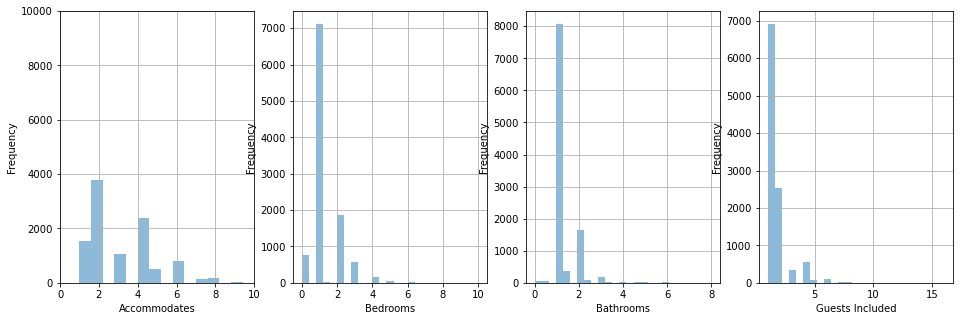

In [1295]:
plt.figure(figsize=(16, 5))

plt.subplot(1,4,1)
df_clean_encoded['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('Accommodates')

plt.subplot(1,4,2)
df_clean_encoded['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(1,4,3)
df_clean_encoded['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,4,4)
df_clean_encoded['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

plt.show()

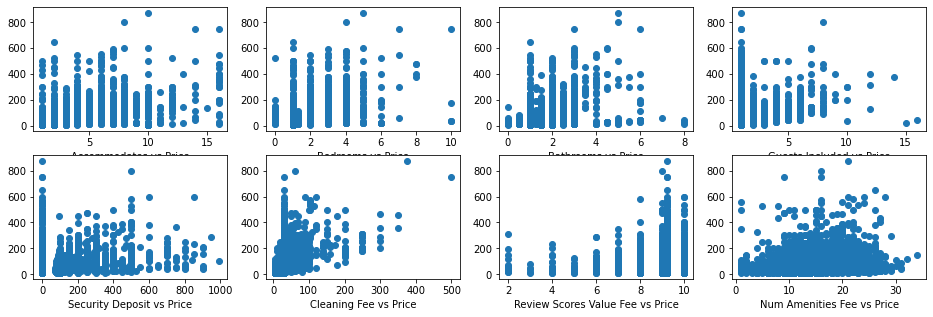

In [1296]:
plt.figure(figsize=(16, 5))

plt.subplot(2,4,1)
plt.scatter(df_clean_encoded['Accommodates'],df_clean_encoded['Price'])
plt.xlabel('Accommodates vs Price')

plt.subplot(2,4,2)
plt.scatter(df_clean_encoded['Bedrooms'],df_clean_encoded['Price'])
plt.xlabel('Bedrooms vs Price')

plt.subplot(2,4,3)
plt.scatter(df_clean_encoded['Bathrooms'],df_clean_encoded['Price'])
plt.xlabel('Bathrooms vs Price')

plt.subplot(2,4,4)
plt.scatter(df_clean_encoded['Guests Included'],df_clean_encoded['Price'])
plt.xlabel('Guests Included vs Price')

plt.subplot(2,4,5)
plt.scatter(df_clean_encoded['Security Deposit'],df_clean_encoded['Price'])
plt.xlabel('Security Deposit vs Price')

plt.subplot(2,4,6)
plt.scatter(df_clean_encoded['Cleaning Fee'],df_clean_encoded['Price'])
plt.xlabel('Cleaning Fee vs Price')

plt.subplot(2,4,7)
plt.scatter(df_clean_encoded['Review Scores Value'],df_clean_encoded['Price'])
plt.xlabel('Review Scores Value Fee vs Price')

plt.subplot(2,4,8)
plt.scatter(df_clean_encoded['Num Amenities'],df_clean_encoded['Price'])
plt.xlabel('Num Amenities Fee vs Price')


plt.show()

## Correlación

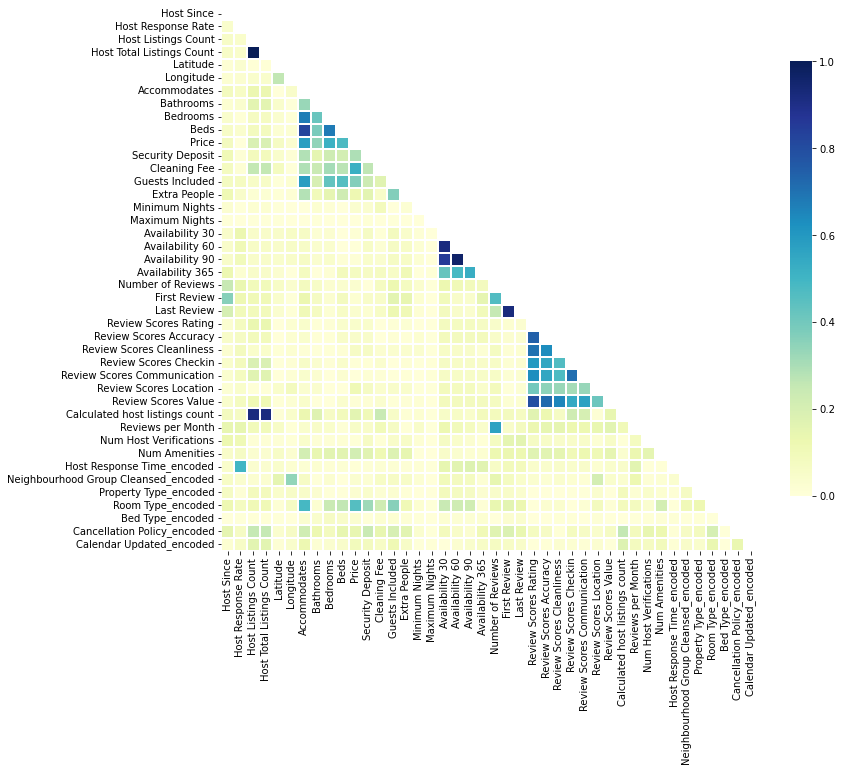

In [1297]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_clean_encoded.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

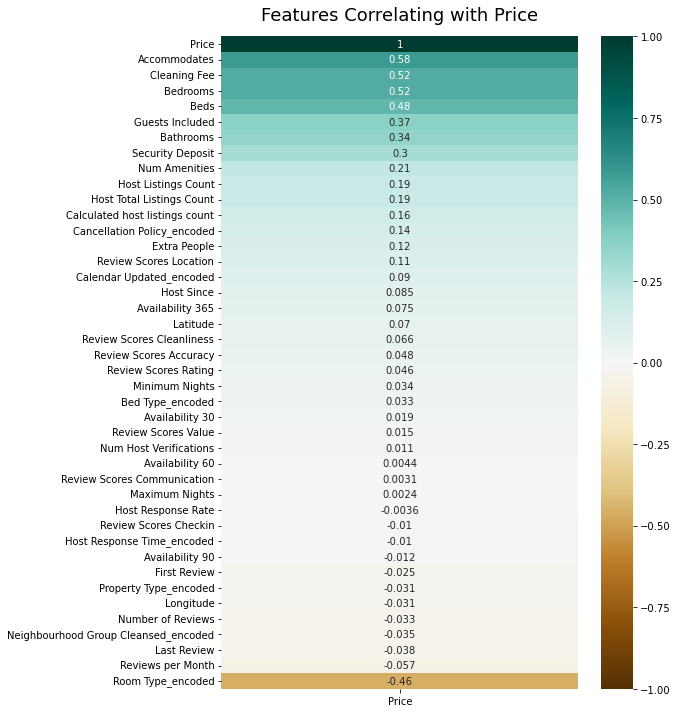

In [1298]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_clean_encoded.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

## Filtrado de caracteristicas

In [1299]:
# df_clean_encoded.dtypes

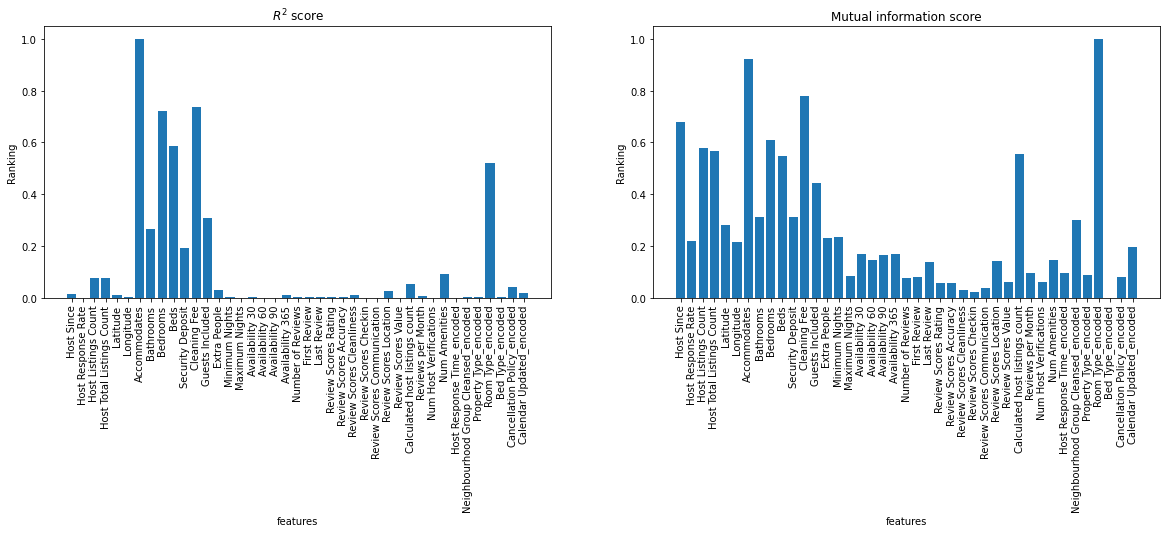

In [1384]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn.feature_selection import f_regression, mutual_info_regression

X = df_clean_encoded.drop(['Price'], axis=1).values
y = df_clean_encoded['Price'].values
feature_names = df_clean_encoded.drop(['Price'], axis=1).columns


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [1417]:
# variables seleccionadas con f_test
selected_f_test=feature_names[f_test>0.4]
print(selected_f_test)

Index(['Accommodates', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Room Type_encoded'],
      dtype='object')


# Preprocesamiento

In [1471]:
from sklearn import preprocessing

y_train = df_clean_encoded['Price'].values    # nos quedamos con price
X_train = df_clean_encoded.drop(['Price'],axis=1).values     # nos quedamos con el resto
feature_names = df_clean_encoded.drop(['Price'],axis=1).columns
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)


In [1536]:
# creamos Xtrain con las features seleccionadas con f_test
X_train_ftest=XtrainScaled[:,feature_names.isin(selected_f_test)]

X_train_ftest.shape

(10559, 5)

# Modelado

## Lasso

best mean cross-validation score: -1383.966
best parameters: {'alpha': 0.005179474679231213}


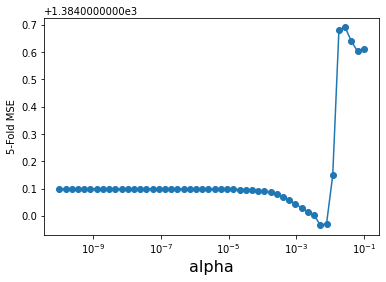

In [1641]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


alpha_vector =  np.logspace(-10,-1,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [1642]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

w = lasso.coef_

# predicción
y_hat_train = lasso.predict(X_train)


# error
mse = np.mean(np.power(y_train - y_hat_train,2))
print("Train mse: ",mse)

rmse = np.sqrt(np.mean(np.power(y_train - y_hat_train,2)))
print("Train rmse: ",rmse)

coef_names = ['w' + str(i) + ': ' for i in range(1,len(w)+1)]
for f,wi in zip(feature_names,w):
    print(f,wi)

Train mse:  1361.956299047182
Train rmse:  36.90469210069611
Host Since 0.0027010342382781244
Host Response Rate -0.1495875940108669
Host Listings Count 0.30296547766857773
Host Total Listings Count 9.323580618256795e-15
Latitude 41.54402535505775
Longitude -2.3162339232760374
Accommodates 6.999779961448286
Bathrooms 11.98956171021706
Bedrooms 9.87935277963714
Beds -1.0118338437455803
Security Deposit 0.006164076838871581
Cleaning Fee 0.7962805554313249
Guests Included 1.585989921134292
Extra People -0.24046424759847138
Minimum Nights -0.031971424890559944
Maximum Nights -4.5426252302220435e-06
Availability 30 0.6860231600318345
Availability 60 0.05705938977507848
Availability 90 -0.05450491824982121
Availability 365 0.007820091474265834
Number of Reviews 0.024157679708267075
First Review -0.005405193063599978
Last Review 0.0012806758392831102
Review Scores Rating 0.3113225016750958
Review Scores Accuracy 1.428537111125849
Review Scores Cleanliness 1.19985633900317
Review Scores Checki

Voy a ir eliminando las variables con coeficiente 0

In [1662]:
selected_lasso=['Host Since','Security Deposit','Availability 60','Availability 90','Availability 365',
               'Number of Reviews','Number of Reviews','First ReviewLast', 'Num Host Verifications','Property Type_encoded',
                'Calendar Updated_encoded']


In [1663]:
X_train_lasso=X_train[:,~feature_names.isin(selected_lasso)]


best mean cross-validation score: -1385.004
best parameters: {'alpha': 0.006707035611184313}


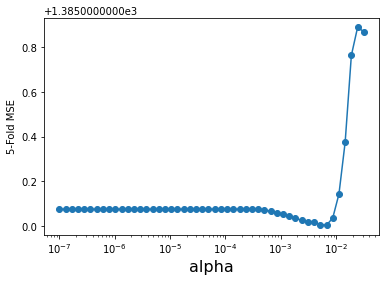

In [1664]:
alpha_vector =  np.logspace(-7,-1.5,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train_lasso, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
# plt.ylim((1650, 1670))
plt.show()

In [1665]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train_lasso,y_train)

w = lasso.coef_

# predicción
y_hat_train = lasso.predict(X_train_lasso)


# error
mse_train = np.mean(np.power(y_train - y_hat_train,2))
print("Train mse: ",mse_train)

rmse_train = np.sqrt(mse_train)
print("Train rmse: ",rmse_train)

coef_names = ['w' + str(i) + ': ' for i in range(1,len(w)+1)]
for f,wi in zip(feature_names,w):
    print(f,wi)

Train mse:  1365.3901502529027
Test mse:  1383.399472381839
Train rmse:  36.95118604663323
Test rmse:  37.19407845856433
Host Since -0.14950232642881134
Host Response Rate 0.2935140321256257
Host Listings Count 7.951478245260974e-16
Host Total Listings Count 39.78181438968312
Latitude -0.0
Longitude 7.006122407491929
Accommodates 12.07306404511624
Bathrooms 9.884366745740929
Bedrooms -1.0107992786744031
Beds 0.8069849661318795
Security Deposit 1.5805171623393963
Cleaning Fee -0.22768155796461342
Guests Included -0.02782062429811535
Extra People -1.952194241274139e-06
Minimum Nights 0.6963580662973627
Maximum Nights -0.0017616246850192085
Availability 30 -0.00222225276949069
Availability 60 0.31912339494685715
Availability 90 1.323895110868589
Availability 365 1.2368614664687716
Number of Reviews -0.34333021427219274
First Review -3.03588717959752
Last Review 5.155737037408969
Review Scores Rating -1.3029926555966744
Review Scores Accuracy -0.3790774111506889
Review Scores Cleanliness -

## Arbol de decision indivual

best mean cross-validation score: 0.496
best parameters: {'max_depth': 6}


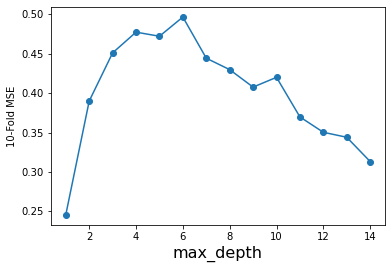

In [1477]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [1478]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))


Train:  0.6434320088522938


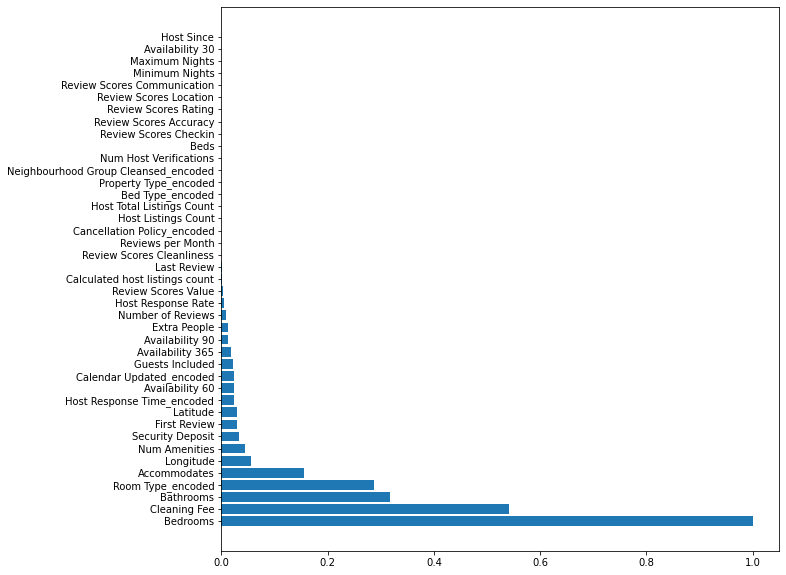

In [1482]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Random forest

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.650
best parameters: {'max_depth': 11}


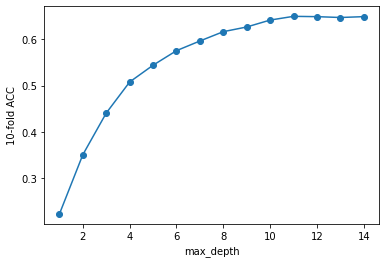

In [1483]:
from sklearn.ensemble import RandomForestRegressor
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=20, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [1481]:
maxDepthOptimo = 10#grid.best_params_['max_depth']
forestModel = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",forestModel.score(X_train,y_train))


Train:  0.8441445920608317


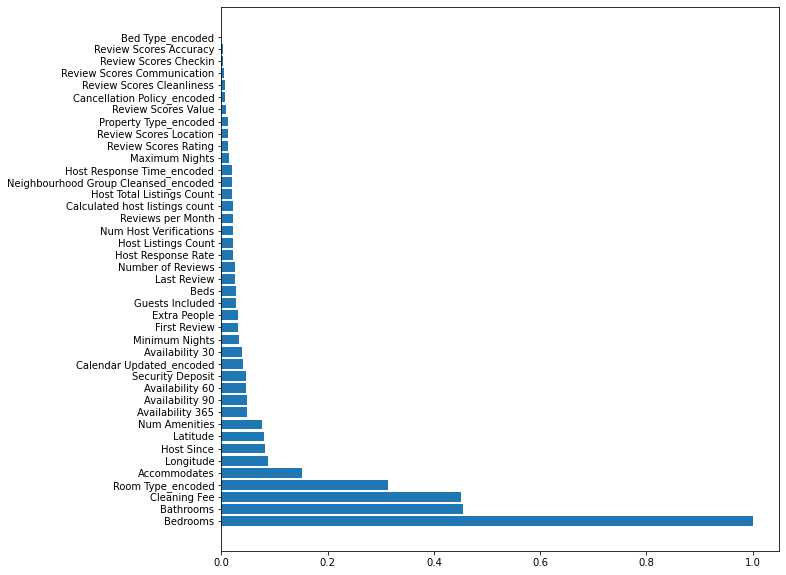

In [1484]:
importances = forestModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Random forest with selected variables

In [1485]:
selected_variables_index=list(indices[:20])
selected_variables_names=feature_names[indices[:20]]

In [1486]:
X_train_selected=X_train[:,selected_variables_index]


Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.646
best parameters: {'max_depth': 14}


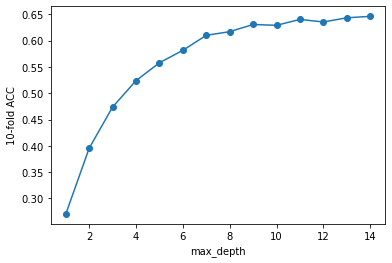

In [1487]:
from sklearn.ensemble import RandomForestRegressor
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=20, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=1) 
grid.fit(X_train_selected, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [1488]:
maxDepthOptimo = 10#grid.best_params_['max_depth']
forestModel_Selected = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X_train_selected,y_train)

print("Train: ",forestModel_Selected.score(X_train_selected,y_train))


Train:  0.8410059284596305


## Boosted trees

In [1520]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
# Niterations = [20,50,100,500]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = 5,verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best mean cross-validation score: 0.686
best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}


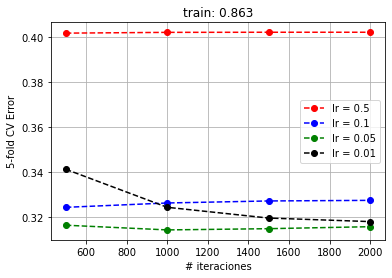

Train:  0.8631216058627518


In [1523]:
# calculamos métricas globales
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f'%(bt.score(X_train,y_train)))
plt.grid()
plt.show()

print("Train: ",bt.score(X_train,y_train))


## XGBoost

In [1531]:
from xgboost import XGBRegressor
Niterations = [500,1000,1500,2000]
# Niterations = [20,50,100,500]
learningRate = [0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=3
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(XGBRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5,verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best mean cross-validation score: 0.686
best parameters: {'learning_rate': 0.05, 'n_estimators': 1500}


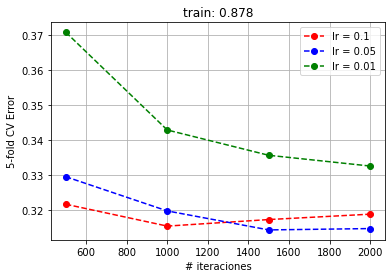

Train:  0.8783435746155963


In [1532]:
# calculamos métricas globales
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
xgbt = XGBRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
xgbt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
# plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_val,y_val)))
plt.title('train: %0.3f'%(xgbt.score(X_train,y_train)))
plt.grid()
plt.show()

print("Train: ",xgbt.score(X_train,y_train))


## SVR

In [1547]:
from sklearn.svm import SVR
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=1)

best mean cross-validation score: 0.599
best parameters: {'C': 100.0, 'gamma': 0.003727593720314938}


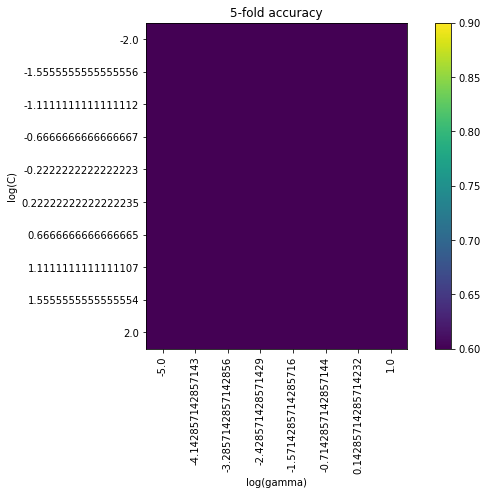

In [1548]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [1549]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TEST): 0.59


## Kernel Ridge 

In [1545]:
from sklearn.kernel_ridge import KernelRidge

# definimos modelo
kRidge = KernelRidge(kernel='rbf',gamma=10,alpha=0.1)
kRidge.fit(XtrainScaled,y_train)

# predicción
XtestScaled = scaler.transform(X_test) 
y_hat = kRidge.predict(XtestScaled)


ValueError: operands could not be broadcast together with shapes (10559,) (2639,) 

In [1546]:
# error test
error_test = np.mean(np.power(y_test - y_hat,2)) 

# error
print('MSE:%.2f'%error_test)

MSE:7218.26


# Evaluar con test

In [1496]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# aplicarle LAS MISMAS transformaciones que hayáis hecho en train 
#(drop de columnas, filtros, generaciones, fill...) y sacar los datos:
df_test_clean = df_test.drop(df.columns[df.columns.str.contains("Url")], axis=1)
df_test_clean = df_test_clean.drop(df.columns[df.columns.str.contains("URL")], axis=1)
df_test_clean = df_test_clean.drop(df.columns[df.columns.str.contains("ID")], axis=1)
df_test_clean = df_test_clean.drop(df.columns[df.columns.str.contains("Scraped")], axis=1)
df_test_clean = df_test_clean.drop(columns_text, axis=1)
# filtro solo las que son de madrid
df_test_clean = df_test_clean[df_test_clean['City']=='Madrid']
# borrar columnas referidas a localizacion
df_test_clean = df_test_clean.drop(['Geolocation'], axis=1)
df_test_clean = df_test_clean.drop(columns_pais, axis=1)
df_test_clean = df_test_clean.drop(['Host Location','Host Neighbourhood'], axis=1)
df_test_clean = df_test_clean.drop(['Street','Neighbourhood','Neighbourhood Cleansed','Zipcode'], axis=1)
df_test_clean = df_test_clean.drop(pct_null[pct_null>0.6].index, axis=1)

In [1497]:
# fillna en test
df_test_clean['Security Deposit']=df_test_clean['Security Deposit'].fillna(0)

# rellenar columnas numericas con la media de train

for i in col_fillna:
    df_test_clean[i].fillna(df_clean[i].mean(),inplace=True)
    
# cambiar columnas con fechas por dias hasta dia de referencia
for i in col_fechas:
    df_test_clean[i]=(dia_ref-pd.to_datetime(df_test_clean[i])).dt.days
    df_test_clean[i]=df_test_clean[i].fillna(0)
    


In [1498]:
#variable host verifications
df_test_clean['Host Verifications'].fillna(mode_host_verif,inplace=True)
df_test_clean['Num Host Verifications']=df_test_clean['Host Verifications'].str.split(',').str.len()
df_test_clean = df_test_clean.drop('Host Verifications', axis=1)

#variable Amenities
df_test_clean['Amenities'].fillna(mode_amenities,inplace=True)
df_test_clean['Num Amenities']=df_test_clean['Amenities'].str.split(',').str.len()
df_test_clean = df_test_clean.drop('Amenities', axis=1)

In [1499]:
# property type tiene demasiados valores distintos, resumo los que tienen menos de 10 valores en other
iprop=iprop.insert(1,'Timeshare')
iprop=iprop.insert(1,'Boat')

df_test_clean.loc[df_test_clean[df_test_clean['Property Type'].isin(iprop)].index,['Property Type']]='Other'

In [1500]:
# VARIABLEs encoded
df_test_clean_encoded=df_test_clean

for i in col_toencode: 
    df_test_clean_encoded[str(i)+'_encoded']=dict_le[i].transform(df_test_clean_encoded[i])
    df_test_clean_encoded=df_test_clean_encoded.drop(i,axis=1)

In [1501]:
df_test_clean_encoded.dropna(subset='Price',inplace=True)

In [1502]:
y_test = df_test_clean_encoded['Price'].values    # nos quedamos con price
X_test = df_test_clean_encoded.drop(['Price'],axis=1).values     # nos quedamos con el resto
feature_names_test = df_test_clean_encoded.drop(['Price'],axis=1).columns

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

## Comprobación de modelos

In [1667]:
X_test_lasso=X_test[:,~feature_names.isin(selected_lasso)]

y_hat_test = lasso.predict(X_test_lasso)
print('Lasso')
mse_test = np.mean(np.power(y_test - y_hat_test,2))
print("Test mse: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Test rmse: ",rmse_test)

Lasso
Test mse:  1383.399472381839
Test rmse:  37.19407845856433


In [1669]:
print('Arbol de decision individual')

y_hat_test = treeModel.predict(X_test)

mse_test = np.mean(np.power(y_test - y_hat_test,2))
print("Test mse: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Test rmse: ",rmse_test)

print("Train R2: ",treeModel.score(X_train,y_train))
print("Test R2: ",treeModel.score(X_test,y_test))

Arbol de decision individual
Test mse:  1408.370936718475
Test rmse:  37.52826850147066
Train R2:  0.6434320088522938
Test R2:  0.5406138644559618


In [1670]:
print('random forest')

y_hat_test = forestModel.predict(X_test)

mse_test = np.mean(np.power(y_test - y_hat_test,2))
print("Test mse: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Test rmse: ",rmse_test)

print("Train R2: ",forestModel.score(X_train,y_train))
print("Test R2: ",forestModel.score(X_test,y_test))

random forest
Test mse:  1143.237933797194
Test rmse:  33.81180169404159
Train R2:  0.8441445920608317
Test R2:  0.6270956445337199


In [1673]:
print('random forest selected')

y_hat_test = forestModel_Selected.predict(X_test_selected)

mse_test = np.mean(np.power(y_test - y_hat_test,2))
print("Test mse: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Test rmse: ",rmse_test)


X_test_selected=X_test[:,selected_variables_index]

print("Train_selected R2: ",forestModel_Selected.score(X_train_selected,y_train))

print("Test_selected R2: ",forestModel_Selected.score(X_test_selected,y_test))

random forest selected
Test mse:  1158.882590034646
Test rmse:  34.04236463635636
Train_selected R2:  0.8410059284596305
Test_selected R2:  0.6219926294235221


In [1675]:
print('boost tree')

y_hat_test = bt.predict(X_test)

mse_test = np.mean(np.power(y_test - y_hat_test,2))
print("Test mse: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Test rmse: ",rmse_test)

print("Train : ",bt.score(X_train,y_train))
print("test : ",bt.score(X_test,y_test))

boost tree
Test mse:  912.5036851528521
Test rmse:  30.20767593100886
Train :  0.8631216058627518
test :  0.7023571484876101


In [1676]:
print('xgboost tree')

y_hat_test = xgbt.predict(X_test)

mse_test = np.mean(np.power(y_test - y_hat_test,2))
print("Test mse: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Test rmse: ",rmse_test)

print("Train R2: ",xgbt.score(X_train,y_train))
print("test R2: ",xgbt.score(X_test,y_test))

xgboost tree
Test mse:  908.5425995212012
Test rmse:  30.14204040076254
Train R2:  0.8783435746155963
test R2:  0.7036491858148806


# Conclusión

Por lo general parece que los modelos de árboles funcionan mejor. Creo capte las variables que influyen sobre el precio parcelando por zona, habitaciones ...
Aun así los resultados no son muy buenos, he obtenido como máximo 0.7 en test con boost trees y xgboost. Sí que he notado la velocidad de xgboost vs boosttrees). 
Para mejorar este resultado creo que podríamos:
- tratar de conseguir la información de la columna metros cuadrados sin tantos null
- añadir otra variables externas como las zonas más turísticas de Madrid
- hacer un tratamiento de las columnas con texto (con NLP) para tratar de sacar información relevante de los comentarios

**Si tuviese que seleccionar un modelo optaría por XGboost tree porque en cuanto a resultados es parecido a boost tree pero nos ofrece más velocidad de recalculo del modelo.**